In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame
from d3blocks import D3Blocks


In [2]:
permutation_results = '../permutation_tests/cross.ancestry.chr7.2'
chroms = np.load('%s.chroms.npy' % permutation_results)
intervals = np.load('%s.intervals.npy' % permutation_results)
z = np.load('%s.npy' % permutation_results)

In [3]:
colors = ['#695d46ff', '#ce93d8ff', '#ef6c00ff', '#4db6acff']


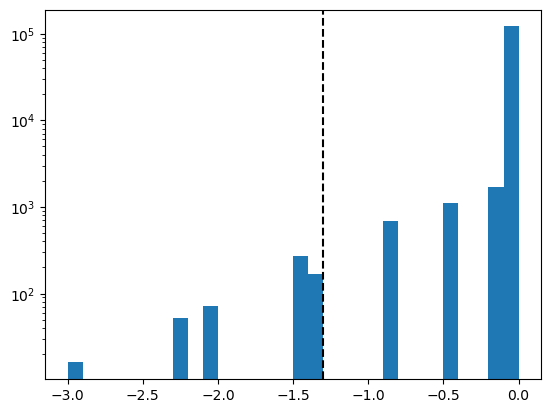

In [4]:
plt.hist(np.clip(np.log10(z), -3, None), bins=np.arange(-3, 0.1, 0.1), log=True)
plt.axvline(np.log10(0.05), color='black', linestyle='--')
plt.show()

In [5]:
num_intervals = len(chroms)
u = np.tile(np.arange(num_intervals), num_intervals)
v = np.repeat(np.arange(num_intervals), num_intervals)

indices = u >= v
x = u[indices]
y = v[indices]

In [6]:
indices = z<0.05
for i in np.where(indices)[0]:
    print(chroms[x[i]], chroms[y[i]], intervals[:, i])

19 7 [3020681 3177283  471567  537898]
19 7 [3646645 3709068  471567  537898]
19 7 [3709068 3718439  471567  537898]
19 7 [3718439 3775122  471567  537898]
19 7 [4800092 4851840  471567  537898]
19 7 [3009792 3020681  537898  635639]
19 7 [3020681 3177283  537898  635639]
19 7 [3177283 3180773  537898  635639]
19 7 [3604269 3646645  537898  635639]
19 7 [3646645 3709068  537898  635639]
19 7 [3709068 3718439  537898  635639]
19 7 [3718439 3775122  537898  635639]
19 7 [3775122 3782299  537898  635639]
19 7 [4720513 4800092  537898  635639]
19 7 [4800092 4851840  537898  635639]
19 7 [4851840 4910913  537898  635639]
19 7 [3009792 3020681  635639  670376]
19 7 [3020681 3177283  635639  670376]
19 7 [3177283 3180773  635639  670376]
19 7 [3604269 3646645  635639  670376]
19 7 [3646645 3709068  635639  670376]
19 7 [3709068 3718439  635639  670376]
19 7 [3718439 3775122  635639  670376]
19 7 [3775122 3782299  635639  670376]
19 7 [4720513 4800092  635639  670376]
19 7 [4800092 4851840  63

19 7 [6273131 6281597 7959996 7962759]
19 7 [6281597 6675016 7959996 7962759]
19 7 [3604269 3646645 7962759 8348872]
19 7 [3646645 3709068 7962759 8348872]
19 7 [3709068 3718439 7962759 8348872]
19 7 [3718439 3775122 7962759 8348872]
19 7 [3775122 3782299 7962759 8348872]
19 7 [4554572 4720513 7962759 8348872]
19 7 [4720513 4800092 7962759 8348872]
19 7 [4800092 4851840 7962759 8348872]
19 7 [4851840 4910913 7962759 8348872]
19 7 [4910913 5456441 7962759 8348872]
19 7 [5456441 5464278 7962759 8348872]
19 7 [5464278 6273131 7962759 8348872]
19 7 [6273131 6281597 7962759 8348872]
19 7 [6281597 6675016 7962759 8348872]
19 7 [6675016 6678743 7962759 8348872]
19 7 [3604269 3646645 8348872 8413684]
19 7 [3646645 3709068 8348872 8413684]
19 7 [3709068 3718439 8348872 8413684]
19 7 [3718439 3775122 8348872 8413684]
19 7 [3775122 3782299 8348872 8413684]
19 7 [4554572 4720513 8348872 8413684]
19 7 [4720513 4800092 8348872 8413684]
19 7 [4800092 4851840 8348872 8413684]
19 7 [4851840 4910913 834

In [21]:
def get_nodes(i):
    return 'chr%s:%d-%d' % (chroms[x[i]], intervals[0, i], intervals[1, i]), \
           'chr%s:%d-%d' % (chroms[y[i]], intervals[2, i], intervals[3, i])

nodes = sorted(set([get_nodes(i)[0] for i in np.where(indices)[0]]) | \
               set([get_nodes(i)[1] for i in np.where(indices)[0]]))
#print(nodes)
# remformat data for display
df = DataFrame(#list(zip(nodes, nodes, np.zeros((len(nodes))))) + \
               list(zip([get_nodes(i)[0] for i in np.where(indices)[0]], 
                        [get_nodes(i)[1] for i in np.where(indices)[0]], 
                        10*np.clip(-np.log10(z[indices]), None, 3))),
               columns=['source', 'target', 'weight'])
print(df)

                    source                  target     weight
0    chr19:3020681-3177283      chr7:471567-537898  13.565473
1    chr19:3646645-3709068      chr7:471567-537898  13.565473
2    chr19:3709068-3718439      chr7:471567-537898  13.565473
3    chr19:3718439-3775122      chr7:471567-537898  13.565473
4    chr19:4800092-4851840      chr7:471567-537898  13.565473
..                     ...                     ...        ...
576  chr19:4910913-5456441  chr7:12577929-12652315  13.565473
577  chr19:5456441-5464278  chr7:12577929-12652315  13.565473
578  chr19:5464278-6273131  chr7:12577929-12652315  13.565473
579  chr19:6273131-6281597  chr7:12577929-12652315  13.565473
580  chr19:6281597-6675016  chr7:12577929-12652315  13.565473

[581 rows x 3 columns]


In [22]:
 


# Initialize
d3 = D3Blocks(chart='Chord', frame=False)

# Node properties
d3.set_node_properties(df, opacity=1, cmap='tab20')
d3.set_edge_properties(df, color='source', opacity=1)
#
#
# Make some edits to highlight the Nuclear node
# d3.node_properties
for n in nodes:
    d3.node_properties.get(n)['color']=colors[0] if n.startswith('chr7') else colors[1]
#d3.node_properties.get('Nuclear')['opacity']=1
# Show the chart
#
d3.show()

## Make edits to highlight the Nuclear Edge
#d3.edge_properties.get(('Nuclear', 'Thermal generation'))['color']='#ff0000'
#d3.edge_properties.get(('Nuclear', 'Thermal generation'))['opacity']=0.8
#d3.edge_properties.get(('Nuclear', 'Thermal generation'))['weight']=1000
#
# Show the chart
d3.show()

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Convert to Dictionary.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/hp/72rjd_x140qf9f9d9f4hy40c0000gp/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/hp/

In [28]:
flat = np.ones((num_intervals,))
poss = np.zeros((num_intervals,))
for i in range(len(z)):
    flat[x[i]] = min(flat[x[i]], z[i])
    flat[y[i]] = min(flat[y[i]], z[i])
    poss[x[i]] = intervals[0, i]
    poss[y[i]] = intervals[2, i]

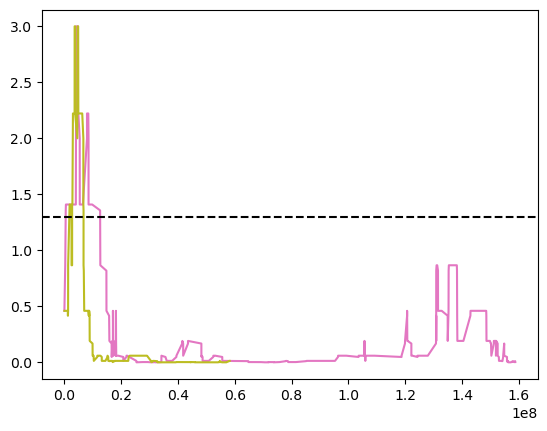

In [31]:
for chrom in [str(x) for x in range(1, 23)]:
    is_in_chrom = np.array([c==chrom for c in chroms])
    plt.plot(poss[is_in_chrom], np.clip(-np.log10(flat[is_in_chrom]), 0, 3))
plt.axhline(-np.log10(0.05), color='black', linestyle='--')
plt.show()